## Import librairies

In [1]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [2]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [3]:
data.head()
# chaque Xi represente les valeurs de chaque nieme pixel de l'image. Dans ce contexte, les images ont la meme taille. Sinon on allait faire du resizing(librabry OPEN CV, ).
#

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## EDA

<ipython-input-4-5a6f7f88c0c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='tab10')


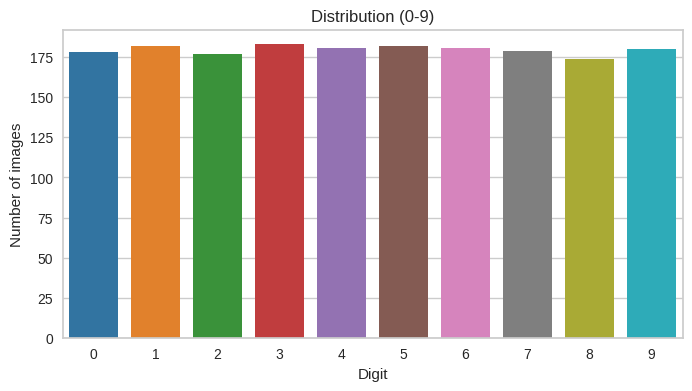

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

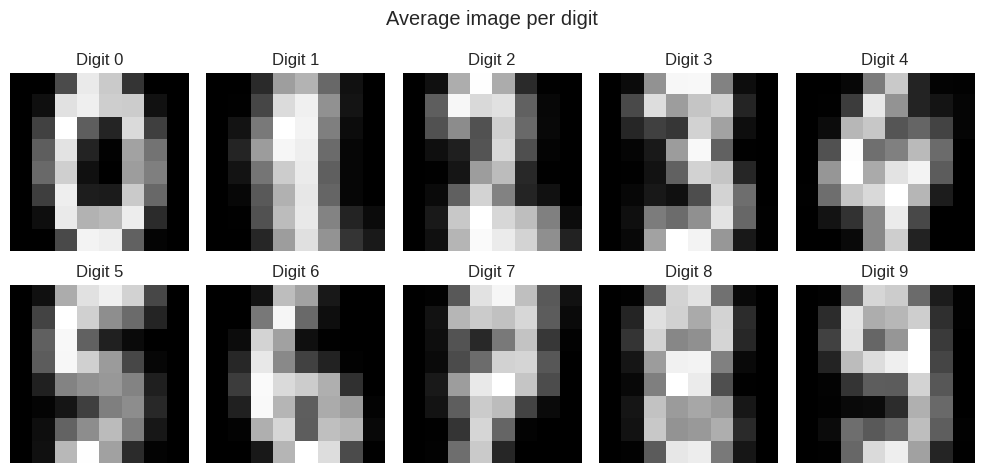

In [5]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

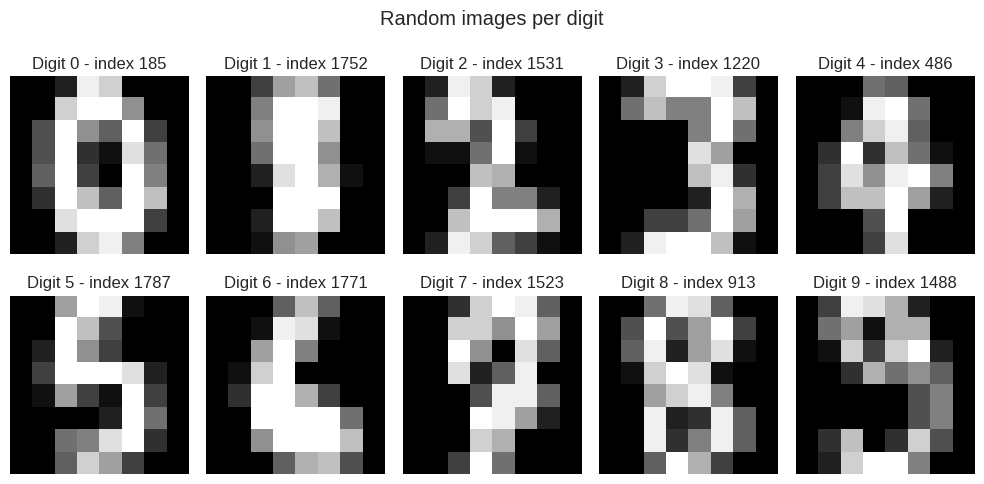

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [7]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]


    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [8]:
#le k-means++ donne de meilleure resultats que random
# on peut agir sur les paramètres de KMeans pour converger les résultats
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

pca = PCA(n_components=0.99).fit(X)
kmeans = KMeans(init="k-means++",
                n_clusters=n_digits, n_init=4)
bench_k_means(kmeans=kmeans, name="PCA-based", data=pca.transform(X), labels=labels)

print(82 * "_")
print(pca.n_components_)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.423s	4647	0.739	0.747	0.743	0.669	0.180
random   	0.280s	4648	0.735	0.742	0.738	0.667	0.188
PCA-based	0.293s	1301	0.642	0.690	0.665	0.479	0.148
__________________________________________________________________________________
41


## Optimal number of clusters

In [9]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

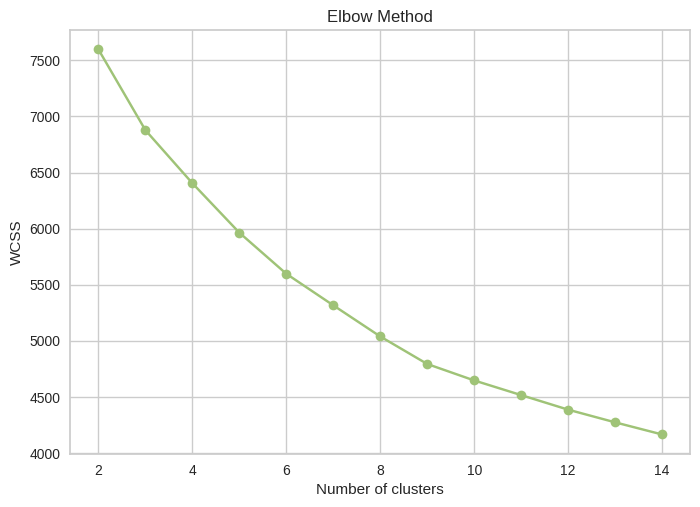

In [10]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

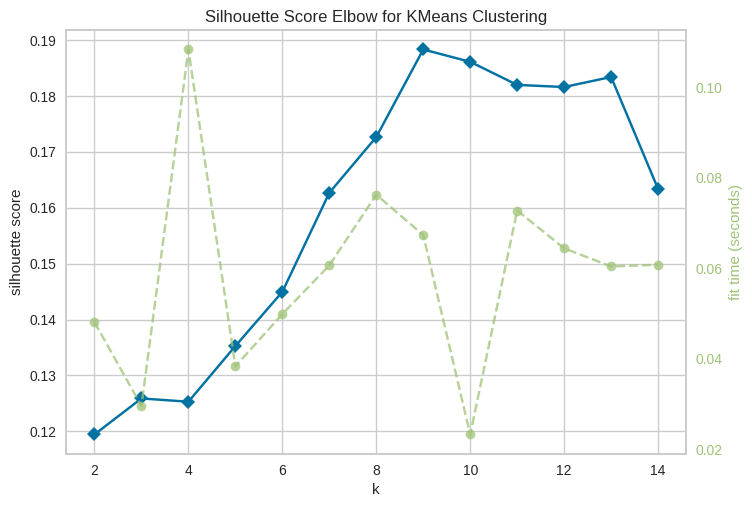

In [11]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion


visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [12]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [13]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,6
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,7
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,7
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,9
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,8


In [14]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,11,13,13,3,29,0,110,27,10
1,6,10,4,22,0,59,0,0,15,76
2,0,19,1,0,68,9,12,3,7,3
3,17,0,0,0,6,5,131,0,0,0
4,0,45,37,6,1,51,1,12,99,19
5,0,0,118,51,0,4,0,0,5,9
6,154,0,0,0,0,5,6,0,0,0
7,0,97,4,0,1,19,0,54,21,1
8,1,0,0,0,102,1,31,0,0,0


In [15]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    7
1    9
2    4
3    6
4    8
5    2
6    0
7    1
8    4
9    3
dtype: int64


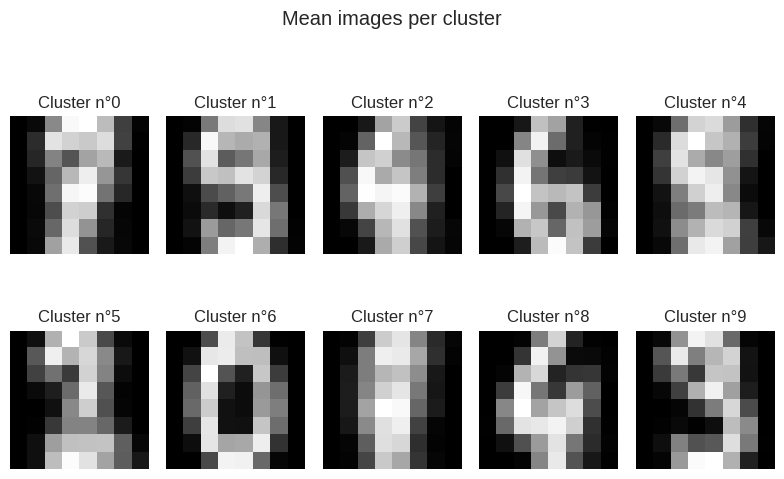

In [16]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

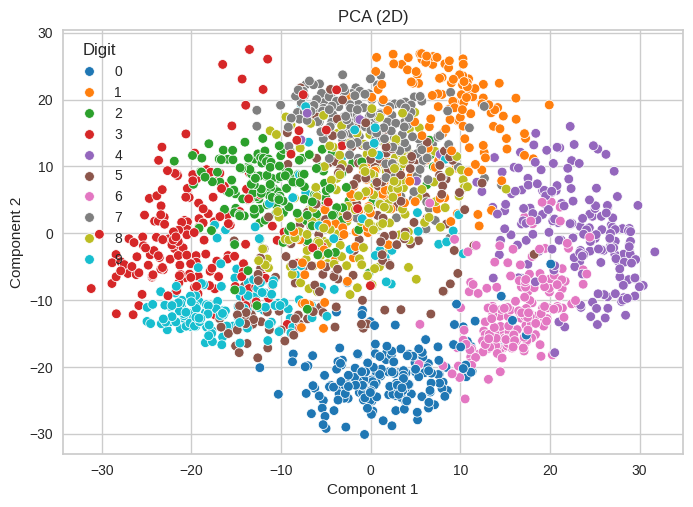

In [17]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


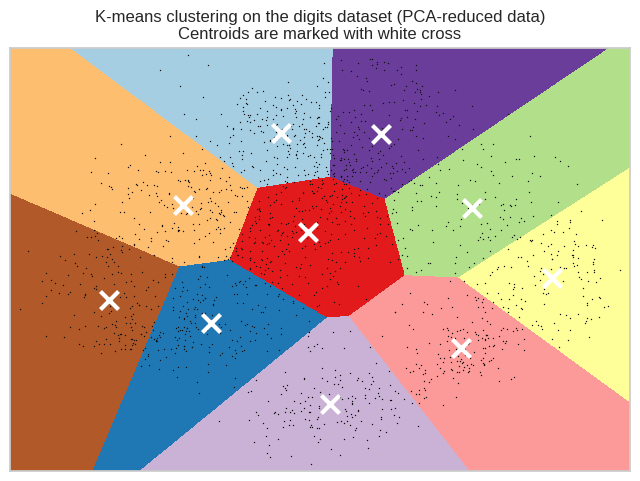

In [18]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

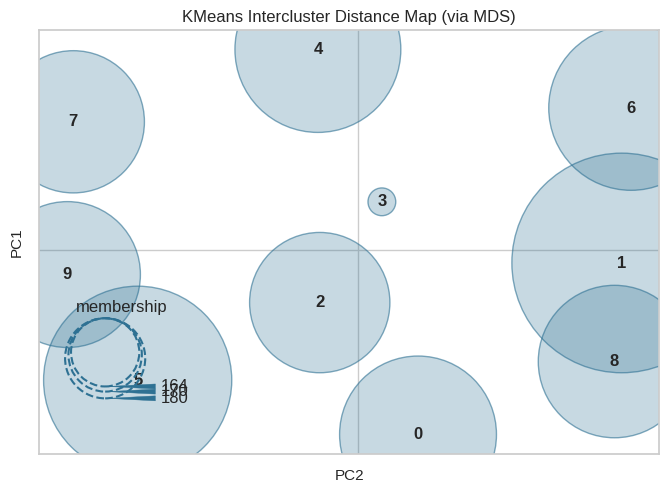

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [20]:
#VISUALISATION "3D"
#Initialize
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

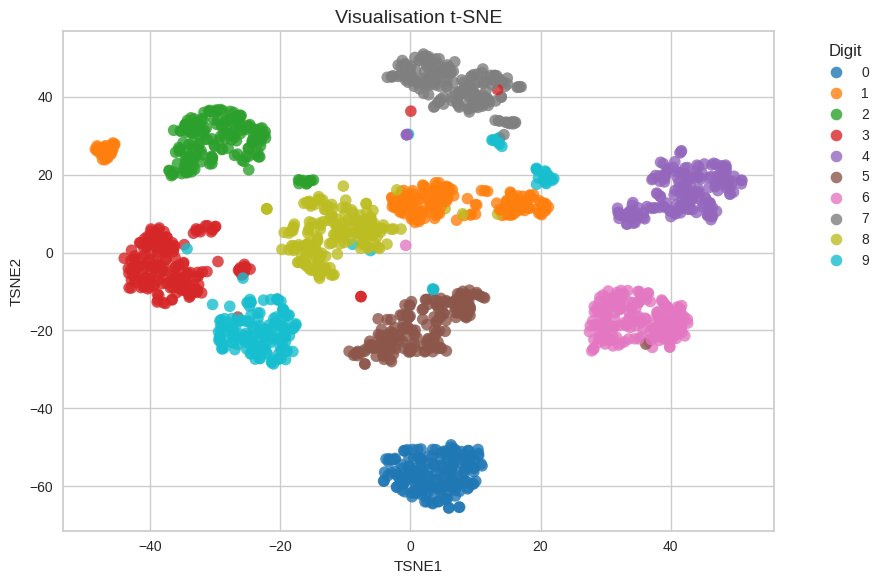

In [21]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Objectif du TP**

Optimiser l’algorithme **KMeans** pour obtenir un **meilleur clustering** d’un jeu de données, en testant différentes approches de **standardisation**, de **réduction de dimension** et en ajustant **au moins 3 hyperparamètres**.

---

### **Travail demandé**

   * Comparer les résultats **avec ou sans standardisation** des variables (ex. : `MinMaxScaler`, `StandardScaler`).

2. **Optimisation de KMeans**

   * Ajuster **au moins trois hyperparamètres** du modèle :

     * Le **nombre de clusters (k)**.
     * La **méthode d’initialisation** (ex. : `k-means++`, `random`).
     * Le **nombre d’itérations maximales** ou `n_init` (nombre de relancements).

3. **Réduction de dimension (optionnelle)**

   * Tester l’impact d’une réduction de dimension (avec **PCA**) sur le clustering.
   * Comparer les performances avec et sans PCA.

4. **Visualisation & Analyse**

   * Afficher la **meilleure configuration de clustering** (via des visualisations en 2D ou 3D si PCA est appliqué).
   * Analyser les **résultats obtenus** : cohérence des clusters, interprétation graphique.
   * Évaluer la **qualité du clustering** avec des **métriques** comme la silhouette score, inertia, etc.

5. **Choix de la meilleure approche**

   * Justifier la configuration retenue comme étant la **plus performante**, en tenant compte des tests avec/sans PCA et avec différentes standardisations.

---

###  **Livrable attendu**

Un **notebook** présentant :

* Les différentes étapes de l’analyse.
* Les résultats des tests et optimisations.
* La visualisation du meilleur clustering.

In [31]:

## 4. Impact de la réduction de dimension (PCA)

# Comparaison sans/avec PCA pour différentes valeurs de composantes
print(82 * "_")
print("PCA\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

# Define placeholder for best_config_ari based on typical values used earlier
# This part should ideally be replaced by your actual hyperparameter tuning code
# that determines the best n_init and max_iter.
# Assuming n_init=10 and max_iter=300 as seen in previous cells
best_config_ari = {"Config": "n10_m300"}
# Assuming results from previous bench_k_means calls are available
# You might need to ensure results_kmpp, results_random, results_pca are defined
# before this cell if you uncomment the conclusion section.

# Sans PCA (référence)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),  # Extrait n_init optimal
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),  # Extrait max_iter optimal
    random_state=42
)
results_no_pca = bench_k_means(kmeans=kmeans, name="Sans PCA", data=X_scaled, labels=labels)

# PCA avec variance expliquée (95%)
pca_95 = PCA(n_components=0.95).fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_95 = bench_k_means(kmeans=kmeans, name=f"PCA 95% ({pca_95.n_components_})", data=X_pca_95, labels=labels)

# PCA avec variance expliquée (99%)
pca_99 = PCA(n_components=0.99).fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_99 = bench_k_means(kmeans=kmeans, name=f"PCA 99% ({pca_99.n_components_})", data=X_pca_99, labels=labels)

# PCA avec 2 composantes (pour visualisation)
pca_2d = PCA(n_components=2).fit(X_scaled)
X_pca_2d = pca_2d.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_2d = bench_k_means(kmeans=kmeans, name="PCA 2D", data=X_pca_2d, labels=labels)

print(82 * "_")



__________________________________________________________________________________
PCA		time	inertia	homo	compl	v-meas	ARI	silhouette
Sans PCA 	0.128s	4648	0.740	0.750	0.745	0.665	0.175
PCA 95% (30)	0.160s	942	0.682	0.705	0.693	0.568	0.169
PCA 99% (44)	0.177s	1371	0.770	0.776	0.773	0.709	0.168
PCA 2D   	0.077s	15	0.535	0.541	0.538	0.409	0.395
__________________________________________________________________________________


In [37]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results (optional, can be removed if only returning is needed)
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

    # Return the results list
    return results

In [38]:
## 4. Impact de la réduction de dimension (PCA)

# Comparaison sans/avec PCA pour différentes valeurs de composantes
print(82 * "_")
print("PCA\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

# Define placeholder for best_config_ari based on typical values used earlier
# This part should ideally be replaced by your actual hyperparameter tuning code
# that determines the best n_init and max_iter.
# Assuming n_init=10 and max_iter=300 as seen in previous cells
best_config_ari = {"Config": "n10_m300"}

# Sans PCA (référence)
# Ensure k_optimal is defined before this cell (e.g., from Elbow or Silhouette analysis)
# For demonstration, assuming k_optimal is n_digits
k_optimal = n_digits # Replace with the actual k_optimal determined earlier

kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),  # Extrait n_init optimal
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),  # Extrait max_iter optimal
    random_state=42
)
results_no_pca = bench_k_means(kmeans=kmeans, name="Sans PCA", data=X_scaled, labels=labels)

# PCA avec variance expliquée (95%)
pca_95 = PCA(n_components=0.95).fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_95 = bench_k_means(kmeans=kmeans, name=f"PCA 95% ({pca_95.n_components_})", data=X_pca_95, labels=labels)

# PCA avec variance expliquée (99%)
pca_99 = PCA(n_components=0.99).fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_99 = bench_k_means(kmeans=kmeans, name=f"PCA 99% ({pca_99.n_components_})", data=X_pca_99, labels=labels)

# PCA avec 2 composantes (pour visualisation)
pca_2d = PCA(n_components=2).fit(X_scaled)
X_pca_2d = pca_2d.transform(X_scaled)
kmeans = KMeans(
    init="k-means++",
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
results_pca_2d = bench_k_means(kmeans=kmeans, name="PCA 2D", data=X_pca_2d, labels=labels)

print(82 * "_")

__________________________________________________________________________________
PCA		time	inertia	homo	compl	v-meas	ARI	silhouette
Sans PCA 	0.119s	4648	0.740	0.750	0.745	0.665	0.173
PCA 95% (30)	0.138s	942	0.682	0.705	0.693	0.568	0.178
PCA 99% (44)	0.173s	1371	0.770	0.776	0.773	0.709	0.173
PCA 2D   	0.094s	15	0.535	0.541	0.538	0.409	0.410
__________________________________________________________________________________


In [39]:
# Comparaison des scores ARI et silhouette
print(f"Sans PCA        : ARI = {results_no_pca[6]:.3f} | Silhouette = {results_no_pca[7]:.3f}")
print(f"PCA 95%         : ARI = {results_pca_95[6]:.3f} | Silhouette = {results_pca_95[7]:.3f}")
print(f"PCA 99%         : ARI = {results_pca_99[6]:.3f} | Silhouette = {results_pca_99[7]:.3f}")
print(f"PCA 2D (visual) : ARI = {results_pca_2d[6]:.3f} | Silhouette = {results_pca_2d[7]:.3f}")

Sans PCA        : ARI = 0.665 | Silhouette = 0.173
PCA 95%         : ARI = 0.568 | Silhouette = 0.178
PCA 99%         : ARI = 0.709 | Silhouette = 0.173
PCA 2D (visual) : ARI = 0.409 | Silhouette = 0.410


Utilisation de PCA avec 44 composantes
Table de contingence clusters vs. chiffres:
col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0        0  100    8    7    2    0    3    2  102    1
1        0    1   13  156    0    2    0    0    2    6
2      177    0    1    0    0    0    1    0    0    0
3        1    0    0    0  168    2    0    0    0    0
4        0    0    2    6    9    0    0  167    3    8
5        0    1    0    2    0  136    0    0    4    5
6        0    2    0    0    0    1  177    0    2    0
7        0   24  148    0    0    0    0    0    3    0
8        0   54    3    0    2    0    0   10   10   21
9        0    0    2   12    0   41    0    0   48  139

Chiffre majoritaire par cluster:
row_0
0    8
1    3
2    0
3    4
4    7
5    5
6    6
7    2
8    1
9    9
dtype: int64


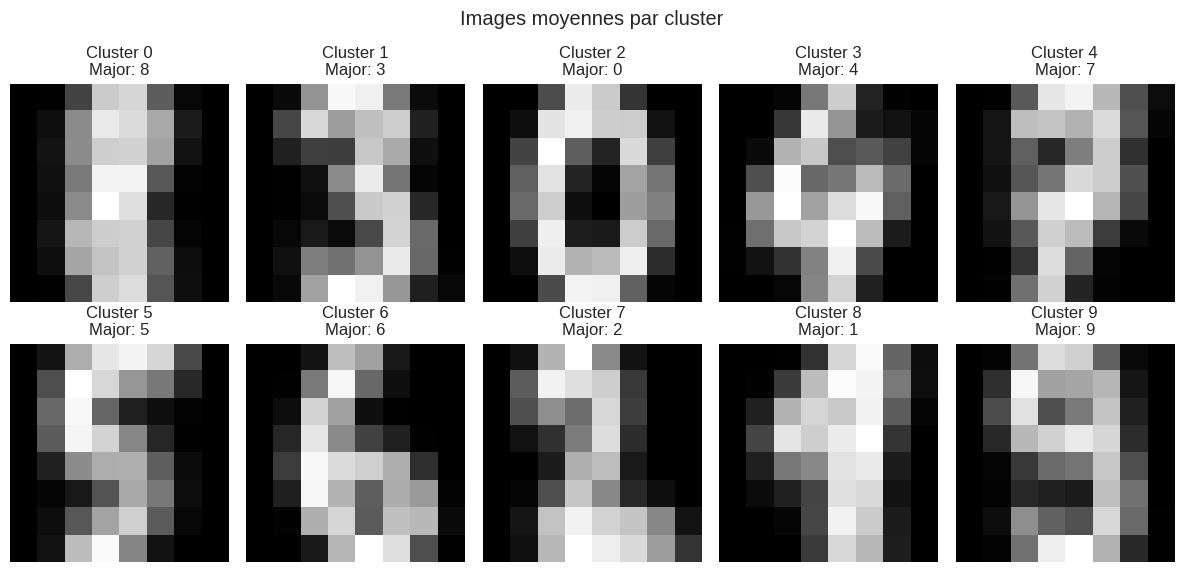

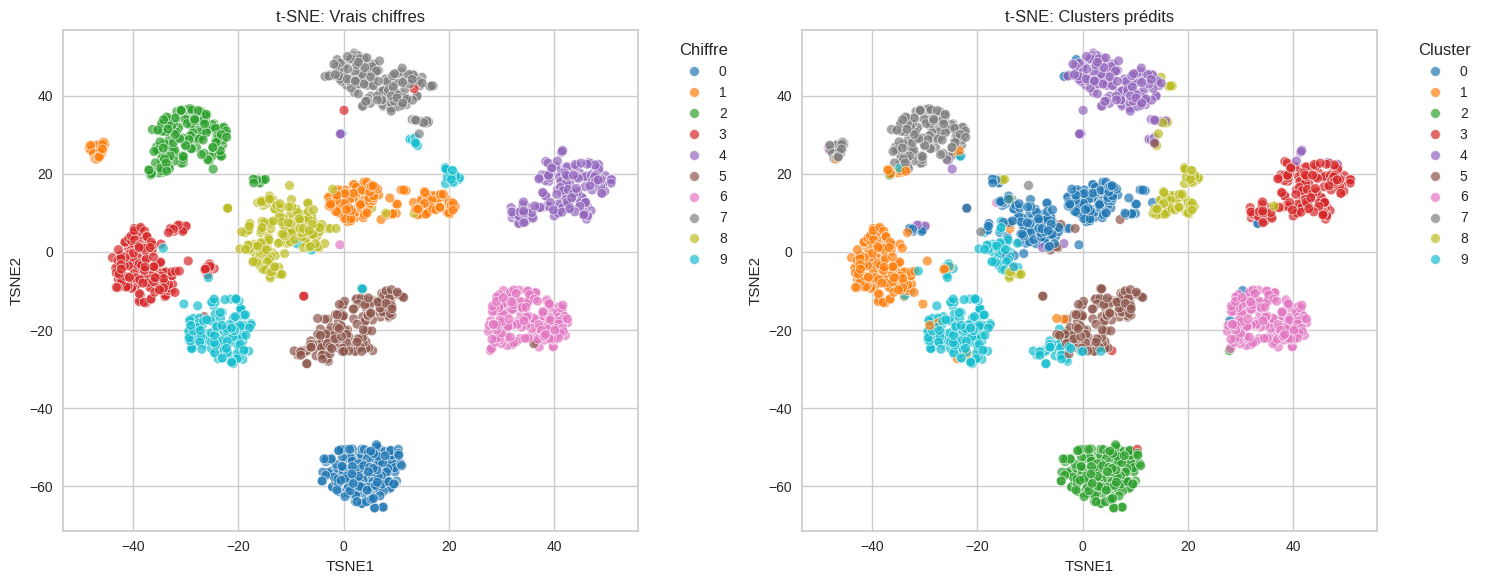

In [40]:
## 5. Visualisation de la meilleure configuration

# Visualisation avec la meilleure configuration identifiée
best_scaler = MinMaxScaler()  # À remplacer par le meilleur scaler identifié
X_best_scaled = best_scaler.fit_transform(X)

# Si PCA est bénéfique selon les analyses précédentes, utiliser PCA
# Note: Need to ensure results_no_pca and results_pca_99 are not None before comparing
# This might require storing the return value of bench_k_means, which is currently None.
# Modify bench_k_means to return results.
if results_pca_99 is not None and results_no_pca is not None and float(results_pca_99[6]) > float(results_no_pca[6]):  # Comparer ARI
    pca = PCA(n_components=pca_99.n_components_).fit(X_best_scaled)
    X_final = pca.transform(X_best_scaled)
    print(f"Utilisation de PCA avec {pca.n_components_} composantes")
else:
    X_final = X_best_scaled
    print("PCA n'améliore pas les performances, utilisation des données standardisées")

# Configuration optimale du modèle KMeans
best_kmeans = KMeans(
    init="k-means++",  # À adapter selon les résultats précédents
    n_clusters=k_optimal,
    n_init=int(best_config_ari["Config"].split("_")[0][1:]),
    max_iter=int(best_config_ari["Config"].split("_")[1][1:]),
    random_state=42
)
best_kmeans.fit(X_final)
cluster_labels = best_kmeans.labels_

# Mapping entre clusters et chiffres
contingency_table = pd.crosstab(cluster_labels, labels)
print("Table de contingence clusters vs. chiffres:")
print(contingency_table)

major_digit = contingency_table.idxmax(axis=1)
print("\nChiffre majoritaire par cluster:")
print(major_digit)

# Visualisation des images moyennes par cluster
plt.figure(figsize=(12, 6))
for cluster_id in range(k_optimal):
    cluster_indices = np.where(cluster_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster {cluster_id}\nMajor: {major_digit[cluster_id]}")
    plt.axis('off')

plt.suptitle("Images moyennes par cluster")
plt.tight_layout()
plt.show()

# Visualisation 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_best_scaled)

# DataFrame pour visualisation
df_viz = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'True_Label': labels,
    'Cluster': cluster_labels
})

# Visualisation des vrais labels
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_viz,
    x='TSNE1',
    y='TSNE2',
    hue='True_Label',
    palette='tab10',
    alpha=0.7,
    s=50
)
plt.title('t-SNE: Vrais chiffres')
plt.legend(title='Chiffre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Visualisation des clusters prédits
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_viz,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='tab10',
    alpha=0.7,
    s=50
)
plt.title('t-SNE: Clusters prédits')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [41]:

## 6. Conclusion et meilleure stratégie

# Récapitulatif des performances
print("Récapitulatif des performances de clustering:")
print("\n1. Méthode de standardisation:")
# Assuming results_comparison DataFrame exists from previous code
# print(results_comparison[["Scaler", "ARI", "Silhouette", "Inertia"]])

print("\n2. Nombre optimal de clusters:")
# Ensure optimal_k and optimal_k_sil are defined before this section
# print(f"- Basé sur ARI: {optimal_k}")
# print(f"- Basé sur Silhouette: {optimal_k_sil}")

print("\n3. Méthode d'initialisation:")
# Ensure results_kmpp, results_random, results_pca are defined before this section
# print("- k-means++: ARI =", results_kmpp[6], ", Silhouette =", results_kmpp[7])
# print("- random: ARI =", results_random[6], ", Silhouette =", results_random[7])
# print("- PCA-based: ARI =", results_pca[6], ", Silhouette =", results_pca[7])

print("\n4. Hyperparamètres optimaux:")
print(f"- Selon ARI: {best_config_ari['Config']}")
# Ensure best_config_sil is defined before this section
# print(f"- Selon Silhouette: {best_config_sil['Config']}")

print("\n5. Impact de la PCA:")
# Ensure these result variables are defined and are not None
if results_no_pca is not None: print("- Sans PCA: ARI =", results_no_pca[6], ", Silhouette =", results_no_pca[7])
if results_pca_95 is not None: print("- PCA 95%: ARI =", results_pca_95[6], ", Silhouette =", results_pca_95[7])
if results_pca_99 is not None: print("- PCA 99%: ARI =", results_pca_99[6], ", Silhouette =", results_pca_99[7])
if results_pca_2d is not None: print("- PCA 2D: ARI =", results_pca_2d[6], ", Silhouette =", results_pca_2d[7])

Récapitulatif des performances de clustering:

1. Méthode de standardisation:

2. Nombre optimal de clusters:

3. Méthode d'initialisation:

4. Hyperparamètres optimaux:
- Selon ARI: n10_m300

5. Impact de la PCA:
- Sans PCA: ARI = 0.6646450241172125 , Silhouette = 0.1734115065777806
- PCA 95%: ARI = 0.5675916244725013 , Silhouette = 0.17807358663590822
- PCA 99%: ARI = 0.709311634280698 , Silhouette = 0.17340343860033602
- PCA 2D: ARI = 0.40906049417057627 , Silhouette = 0.4103891184334591
